In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
dataset=pd.read_csv("/root/Projects/suv_data.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
#dataset.describe()

In [4]:
print('Total Number of Customers: '+str(len(dataset)))

Total Number of Customers: 400


# Analysing SUV Data

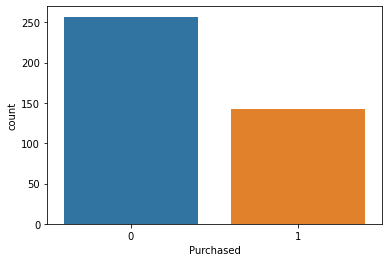

In [6]:
sns.countplot(x='Purchased',data=dataset)

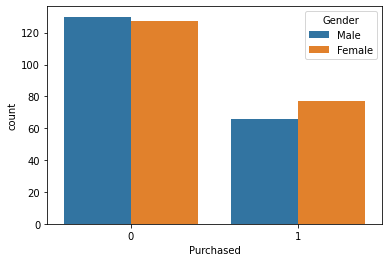

In [7]:
sns.countplot(x='Purchased',hue='Gender',data=dataset)

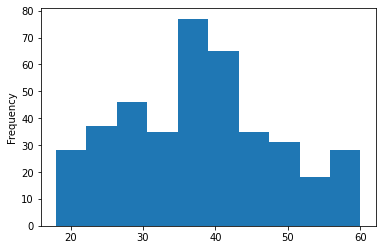

In [12]:
#sns.countplot(x='Age',hue='Purchased',data=dataset)
dataset['Age'].plot.hist()

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


# Wrangling

In [14]:
dataset.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [15]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

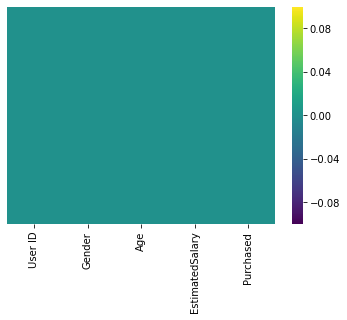

In [17]:
sns.heatmap(dataset.isnull(),yticklabels=False,cmap='viridis')

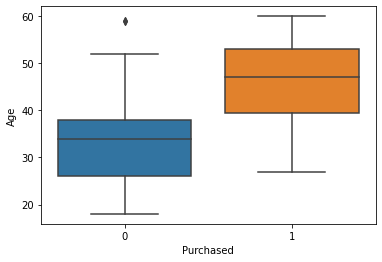

In [18]:
sns.boxplot(x='Purchased',y='Age',data=dataset)

In [19]:
dataset.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [22]:
dataset.drop(['User ID','Gender'],axis=1,inplace=True)

In [25]:
dataset.head(2)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0


# Train Data

In [28]:
X=dataset.iloc[:,[0,1]].values
y=dataset.iloc[:,2].values

In [31]:
#X
#y

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test,y_train,y_test= train_test_split(X,y, test_size=0.25,random_state=0)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [41]:
from sklearn.linear_model import LogisticRegression

In [43]:
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
y_pred=classifier.predict(X_test)
#y_pred

In [65]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
confusion_matrix(y_test,y_pred)

array([[65,  3],
       [ 8, 24]])

In [60]:
accuracy_score(y_test,y_pred)*100

89.0

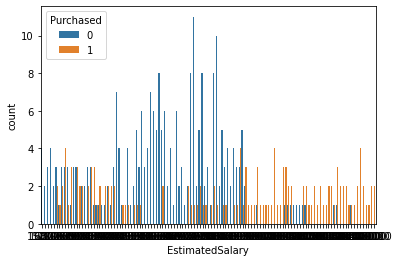

In [5]:
dataset.head(2)
sns.countplot(x='EstimatedSalary',hue='Purchased',data=dataset)